In [56]:
from mplsoccer import Pitch, VerticalPitch
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb
%matplotlib inline 

In [57]:
sb.competitions().sort_values(by ='season_name', ascending=False)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
42,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-02-22T23:06:39.942980,2023-06-18T16:10:51.892204,2023-06-18T16:10:51.892204,2023-02-22T23:06:39.942980
18,43,106,International,FIFA World Cup,male,False,True,2022,2023-06-24T17:17:27.911026,2023-06-24T17:18:55.629111,2023-06-24T17:18:55.629111,2023-06-24T17:17:27.911026
20,1238,108,India,Indian Super league,male,False,False,2021/2022,2023-03-31T02:14:09.896947,None,None,2023-03-31T02:14:09.896947
15,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729
21,11,90,Spain,La Liga,male,False,False,2020/2021,2022-12-05T14:39:07.366723,2023-04-28T08:23:01.474542,2023-04-28T08:23:01.474542,2022-12-05T14:39:07.366723
41,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
22,11,42,Spain,La Liga,male,False,False,2019/2020,2023-04-19T10:52:22.240135,2021-06-13T16:17:31.694,None,2023-04-19T10:52:22.240135
16,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-02-25T12:45:18.376026,2021-06-13T16:17:31.694,None,2023-02-25T12:45:18.376026
43,72,30,International,Women's World Cup,female,False,True,2019,2023-04-07T09:00:52.515359,2021-06-13T16:17:31.694,None,2023-04-07T09:00:52.515359
0,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250


In [58]:
sb.matches(competition_id=16, season_id=41).sort_values(by='match_id')

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3750201,2009-05-27,20:45:00.000,Europe - Champions League,2008/2009,Barcelona,Manchester United,2,0,available,...,2021-06-13T16:17:31.694,1,Final,Estadio Olímpico,Massimo Busacca,Josep Guardiola i Sala,Alex Ferguson,1.1.0,2,2


In [59]:
df=sb.events(match_id=3750201)
df[df.type=='Substitution'][['minute','player']]

,minute,player
3322,45,Anderson Luis de Abreu Oliveira
3323,65,Ji-Sung Park
3324,71,Thierry Henry
3325,74,Ryan Giggs
3326,92,Andrés Iniesta Luján


In [60]:
df.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_no_touch', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_miscommunic

In [61]:
df=df[['location','pass_end_location','pass_outcome',
                     'pass_type','player','pass_recipient','possession_team','team','minute','second',
                     'type', 'shot_end_location','shot_outcome']]
df.sort_values(by=['minute','second'], inplace=True)
df.reset_index
df

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,type,shot_end_location,shot_outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,Starting XI,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,Starting XI,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,Half Start,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,Half Start,NaN,NaN
6,"[61.0, 40.1]","[60.2, 43.4]",NaN,Kick Off,Andrés Iniesta Luján,Lionel Andrés Messi Cuccittini,Barcelona,Barcelona,0,0,Pass,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,"[74.2, 74.1]",NaN,NaN,NaN,Lionel Andrés Messi Cuccittini,NaN,Barcelona,Barcelona,92,24,Foul Won,NaN,NaN
1008,"[74.6, 72.1]","[69.5, 75.9]",NaN,Free Kick,Xavier Hernández Creus,Lionel Andrés Messi Cuccittini,Barcelona,Barcelona,93,14,Pass,NaN,NaN
1881,"[69.5, 75.9]",NaN,NaN,NaN,Lionel Andrés Messi Cuccittini,NaN,Barcelona,Barcelona,93,16,Ball Receipt*,NaN,NaN
3320,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,93,17,Half End,NaN,NaN


In [62]:
playername={'Lionel Andrés Messi Cuccittini':'Messi','Sergio Busquets i Burgos': 'Busquets',
       'Gnégnéri Yaya Touré':'Yaya Toure', 'Gerard Piqué Bernabéu':'Pique',
       'Víctor Valdés Arribas':'Victor Valdés', 'Ryan Giggs':'Giggs',
        "John O''Shea":'O´Shea','Michael Carrick':'Carrick',
        'Nemanja Vidić':'Vidic', 'Wayne Mark Rooney':'Rooney',
       'Anderson Luis de Abreu Oliveira':'Anderson', 'Patrice Evra':'Evra',
        'Thierry Henry': 'Henry', "Samuel Eto''o Fils":'Etóo',
        'Edwin van der Sar':'Van der sar', 'Ji-Sung Park':'Ji-Sung Park',
       'Andrés Iniesta Luján':'Iniesta', 'Sylvio Mendes Campos Junior':'Silvinho',
       'Cristiano Ronaldo dos Santos Aveiro':'Cristiano Ronaldo', 'Rio Ferdinand':'Ferdinand',
       'Xavier Hernández Creus':'Xavi', 'Carles Puyol i Saforcada':'Puyol',
       'Carlos Alberto Tevez':'Tevez', 'Dimitar Ivanov Berbatov':'Berbatov',
        'Paul Scholes':'Scholes','Seydou Kéita':'Kéita'}
df.player=df.player.map(playername)
df.pass_recipient=df.pass_recipient.map(playername)

In [63]:
df[['x_start','y_start']]=df.location.apply(pd.Series)
df[['x_pend','y_pend']]=df.pass_end_location.apply(pd.Series)
df[['x_shend','y_shend','z_shend']]=df.shot_end_location.apply(pd.Series)

In [64]:
df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Tactical Shift', 'Pressure', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Ball Recovery', 'Block', 'Clearance',
       'Dispossessed', 'Duel', 'Interception', 'Dribbled Past', 'Dribble',
       'Miscontrol', 'Injury Stoppage', 'Substitution', 'Half End',
       'Referee Ball-Drop'], dtype=object)

In [65]:
df.player.unique()

array([nan, 'Iniesta', 'Messi', 'Busquets', 'Yaya Toure', 'Pique',
       'Victor Valdés', 'O´Shea', 'Silvinho', 'Giggs', 'Etóo',
       'Ferdinand', 'Carrick', 'Vidic', 'Rooney', 'Anderson', 'Evra',
       'Cristiano Ronaldo', 'Ji-Sung Park', 'Xavi', 'Henry',
       'Van der sar', 'Puyol', 'Tevez', 'Kéita', 'Berbatov', 'Scholes'],
      dtype=object)

In [66]:
position={'Iniesta':'Cm', 'Messi':'Rw', 'Busquets':'Cdm', 'Yaya Toure':'Cb', 'Pique':'cb',
       'Victor Valdés':'Gk', 'O´Shea':'Rb', 'Silvinho':'Lb', 'Giggs':'Cm', 'Etóo':'St', 'Ferdinand':'Cb',
       'Carrick':'Cm', 'Vidic':'Cb', 'Rooney':'Lf', 'Anderson':'Cm', 'Evra':'Lb',
       'Cristiano Ronaldo':'St', 'Ji-Sung Park':'Rm', 'Xavi':'Cm', 'Henry':'Lw',
       'Van der sar':'Gk', 'Puyol':'Rb', 'Tevez':'St', 'Kéita':'Cm', 'Berbatov':'St', 'Scholes':'Cm'}
df['position']=df.player.map(position)



In [67]:
df_45=df[(df.minute<=44) & (df.second<=59)]
df_45

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,...,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend,position
0,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[61.0, 40.1]","[60.2, 43.4]",NaN,Kick Off,Iniesta,Messi,Barcelona,Barcelona,0,0,...,NaN,NaN,61.0,40.1,60.2,43.4,NaN,NaN,NaN,Cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,"[69.4, 34.5]",NaN,NaN,NaN,Xavi,NaN,Barcelona,Barcelona,44,57,...,NaN,NaN,69.4,34.5,NaN,NaN,NaN,NaN,NaN,Cm
472,"[67.5, 37.3]","[65.1, 42.9]",NaN,NaN,Xavi,Iniesta,Barcelona,Barcelona,44,59,...,NaN,NaN,67.5,37.3,65.1,42.9,NaN,NaN,NaN,Cm
473,"[65.1, 42.9]","[75.0, 26.6]",NaN,NaN,Iniesta,Messi,Barcelona,Barcelona,44,59,...,NaN,NaN,65.1,42.9,75.0,26.6,NaN,NaN,NaN,Cm
1410,"[65.1, 42.9]",NaN,NaN,NaN,Iniesta,NaN,Barcelona,Barcelona,44,59,...,NaN,NaN,65.1,42.9,NaN,NaN,NaN,NaN,NaN,Cm


In [68]:
df_45[df_45.x_pend>=1]

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,...,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend,position
6,"[61.0, 40.1]","[60.2, 43.4]",NaN,Kick Off,Iniesta,Messi,Barcelona,Barcelona,0,0,...,NaN,NaN,61.0,40.1,60.2,43.4,NaN,NaN,NaN,Cm
7,"[61.3, 41.1]","[48.4, 40.8]",NaN,NaN,Messi,Busquets,Barcelona,Barcelona,0,0,...,NaN,NaN,61.3,41.1,48.4,40.8,NaN,NaN,NaN,Rw
8,"[47.1, 40.8]","[33.0, 47.8]",NaN,NaN,Busquets,Yaya Toure,Barcelona,Barcelona,0,2,...,NaN,NaN,47.1,40.8,33.0,47.8,NaN,NaN,NaN,Cdm
9,"[33.0, 47.8]","[26.5, 27.8]",NaN,NaN,Yaya Toure,Pique,Barcelona,Barcelona,0,3,...,NaN,NaN,33.0,47.8,26.5,27.8,NaN,NaN,NaN,Cb
10,"[26.5, 27.8]","[7.9, 35.3]",NaN,NaN,Pique,Victor Valdés,Barcelona,Barcelona,0,5,...,NaN,NaN,26.5,27.8,7.9,35.3,NaN,NaN,NaN,cb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,"[45.2, 53.8]","[38.6, 32.7]",NaN,NaN,Yaya Toure,Pique,Barcelona,Barcelona,44,47,...,NaN,NaN,45.2,53.8,38.6,32.7,NaN,NaN,NaN,Cb
470,"[57.5, 15.4]","[80.9, 28.2]",NaN,NaN,Pique,Messi,Barcelona,Barcelona,44,53,...,NaN,NaN,57.5,15.4,80.9,28.2,NaN,NaN,NaN,cb
471,"[77.2, 31.9]","[69.4, 34.5]",NaN,NaN,Messi,Xavi,Barcelona,Barcelona,44,56,...,NaN,NaN,77.2,31.9,69.4,34.5,NaN,NaN,NaN,Rw
472,"[67.5, 37.3]","[65.1, 42.9]",NaN,NaN,Xavi,Iniesta,Barcelona,Barcelona,44,59,...,NaN,NaN,67.5,37.3,65.1,42.9,NaN,NaN,NaN,Cm


# Passing net first half

In [69]:
df_45=df_45[(((df_45.team=='Barcelona') & (df_45.possession_team=='Barcelona')) |
           ((df_45.team=='Manchester United') & (df_45.possession_team=='Manchester United'))) &
           df_45.x_pend>=1]
df_45

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,...,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend,position
6,"[61.0, 40.1]","[60.2, 43.4]",NaN,Kick Off,Iniesta,Messi,Barcelona,Barcelona,0,0,...,NaN,NaN,61.0,40.1,60.2,43.4,NaN,NaN,NaN,Cm
7,"[61.3, 41.1]","[48.4, 40.8]",NaN,NaN,Messi,Busquets,Barcelona,Barcelona,0,0,...,NaN,NaN,61.3,41.1,48.4,40.8,NaN,NaN,NaN,Rw
8,"[47.1, 40.8]","[33.0, 47.8]",NaN,NaN,Busquets,Yaya Toure,Barcelona,Barcelona,0,2,...,NaN,NaN,47.1,40.8,33.0,47.8,NaN,NaN,NaN,Cdm
9,"[33.0, 47.8]","[26.5, 27.8]",NaN,NaN,Yaya Toure,Pique,Barcelona,Barcelona,0,3,...,NaN,NaN,33.0,47.8,26.5,27.8,NaN,NaN,NaN,Cb
10,"[26.5, 27.8]","[7.9, 35.3]",NaN,NaN,Pique,Victor Valdés,Barcelona,Barcelona,0,5,...,NaN,NaN,26.5,27.8,7.9,35.3,NaN,NaN,NaN,cb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,"[45.2, 53.8]","[38.6, 32.7]",NaN,NaN,Yaya Toure,Pique,Barcelona,Barcelona,44,47,...,NaN,NaN,45.2,53.8,38.6,32.7,NaN,NaN,NaN,Cb
470,"[57.5, 15.4]","[80.9, 28.2]",NaN,NaN,Pique,Messi,Barcelona,Barcelona,44,53,...,NaN,NaN,57.5,15.4,80.9,28.2,NaN,NaN,NaN,cb
471,"[77.2, 31.9]","[69.4, 34.5]",NaN,NaN,Messi,Xavi,Barcelona,Barcelona,44,56,...,NaN,NaN,77.2,31.9,69.4,34.5,NaN,NaN,NaN,Rw
472,"[67.5, 37.3]","[65.1, 42.9]",NaN,NaN,Xavi,Iniesta,Barcelona,Barcelona,44,59,...,NaN,NaN,67.5,37.3,65.1,42.9,NaN,NaN,NaN,Cm


In [70]:
df_45=df_45[~df_45.pass_type.isin(['Kick Off','Throw-in','Corner',
       'Free Kick'])]
df_45.type.unique()

array(['Pass'], dtype=object)

In [103]:
df_45=df_45[['player','pass_recipient','team','position','x_start','y_start', 'x_pend','y_pend']]
df_45.sample(10)

,player,pass_recipient,team,position,x_start,y_start,x_pend,y_pend
404,Cristiano Ronaldo,Rooney,Manchester United,St,92.5,11.8,98.7,3.8
456,Iniesta,Messi,Barcelona,Cm,101.0,33.4,117.8,31.7
350,Iniesta,Messi,Barcelona,Cm,71.3,18.1,75.8,29.1
346,Messi,Pique,Barcelona,Rw,62.1,64.5,51.4,21.4
190,Ferdinand,Van der sar,Manchester United,Cb,26.6,66.6,2.0,57.2
461,Silvinho,Messi,Barcelona,Lb,50.8,5.8,57.6,7.4
130,Vidic,Ji-Sung Park,Manchester United,Cb,33.7,36.7,68.2,71.8
17,Carrick,Vidic,Manchester United,Cm,60.3,65.8,38.3,44.6
455,Messi,Iniesta,Barcelona,Rw,93.9,31.9,101.0,33.4
295,Silvinho,Iniesta,Barcelona,Lb,65.1,12.8,63.9,18.4


In [105]:
unique_players_df = df[['player', 'team']].drop_duplicates()

# Print the extracted data frame
unique_players_df

,player,team
0,NaN,Barcelona
1,NaN,Manchester United
6,Iniesta,Barcelona
7,Messi,Barcelona
1010,Busquets,Barcelona
9,Yaya Toure,Barcelona
10,Pique,Barcelona
11,Victor Valdés,Barcelona
12,O´Shea,Manchester United
2674,Silvinho,Barcelona


In [86]:
avg_pos=df_45.groupby('player').agg({'x_start':['mean'],'y_start':['mean','count']})
avg_pos.columns=['x','y','count']
avg_pos.reset_index(inplace=True)
avg_pos['pos']=avg_pos.player.map(position)a

,player,x,y,count,pos
0,Anderson,67.592308,22.184615,13,Cm
1,Busquets,57.294118,44.276471,17,Cdm
2,Carrick,54.048148,40.014815,27,Cm
3,Cristiano Ronaldo,80.280000,34.400000,10,St
4,Etóo,88.375000,55.700000,8,St
5,Evra,63.610526,5.310526,19,Lb
6,Ferdinand,39.450000,53.955000,20,Cb
7,Giggs,66.462500,40.850000,8,Cm
8,Henry,78.920000,19.740000,10,Lw
9,Iniesta,71.163636,28.278788,33,Cm


In [108]:
avg_pos = unique_players_df.merge(avg_pos, on='player', how='right')
avg_pos

,player,team,x,y,count,pos
0,Anderson,Manchester United,67.592308,22.184615,13,Cm
1,Busquets,Barcelona,57.294118,44.276471,17,Cdm
2,Carrick,Manchester United,54.048148,40.014815,27,Cm
3,Cristiano Ronaldo,Manchester United,80.280000,34.400000,10,St
4,Etóo,Barcelona,88.375000,55.700000,8,St
5,Evra,Manchester United,63.610526,5.310526,19,Lb
6,Ferdinand,Manchester United,39.450000,53.955000,20,Cb
7,Giggs,Manchester United,66.462500,40.850000,8,Cm
8,Henry,Barcelona,78.920000,19.740000,10,Lw
9,Iniesta,Barcelona,71.163636,28.278788,33,Cm


In [109]:
pass_between=df_45.groupby(['player','pass_recipient']).count().reset_index()
pass_between.rename(columns={'team':'pass_count'}, inplace=True)
pass_between=pass_between[['player','pass_recipient','pass_count']]
pass_between

,player,pass_recipient,pass_count
0,Anderson,Carrick,3
1,Anderson,Cristiano Ronaldo,1
2,Anderson,Evra,3
3,Anderson,Ferdinand,1
4,Anderson,Ji-Sung Park,1
...,...,...,...
134,Yaya Toure,Messi,2
135,Yaya Toure,Pique,2
136,Yaya Toure,Puyol,5
137,Yaya Toure,Silvinho,1


In [110]:
pass_between=pass_between.merge(avg_pos,left_on='player',right_on='player',how='left')
pass_between=pass_between.merge(avg_pos,left_on='pass_recipient',right_on='player',how='left', suffixes=['','_end'])

In [271]:
df

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,...,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend,position
0,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Barcelona,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"[61.0, 40.1]","[60.2, 43.4]",NaN,Kick Off,Iniesta,Messi,Barcelona,Barcelona,0,0,...,NaN,NaN,61.0,40.1,60.2,43.4,NaN,NaN,NaN,Cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,"[74.2, 74.1]",NaN,NaN,NaN,Messi,NaN,Barcelona,Barcelona,92,24,...,NaN,NaN,74.2,74.1,NaN,NaN,NaN,NaN,NaN,Rw
1008,"[74.6, 72.1]","[69.5, 75.9]",NaN,Free Kick,Xavi,Messi,Barcelona,Barcelona,93,14,...,NaN,NaN,74.6,72.1,69.5,75.9,NaN,NaN,NaN,Cm
1881,"[69.5, 75.9]",NaN,NaN,NaN,Messi,NaN,Barcelona,Barcelona,93,16,...,NaN,NaN,69.5,75.9,NaN,NaN,NaN,NaN,NaN,Rw
3320,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,Manchester United,93,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
manchester_df=pass_between[pass_between.team=='Manchester United']
avg_posm=avg_pos[avg_pos.team=='Manchester United']
barcelona_df=pass_between[pass_between.team=='Barcelona']
avg_posb=avg_pos[avg_pos.team=='Barcelona']
avg_posb

,player,team,x,y,count,pos
1,Busquets,Barcelona,57.294118,44.276471,17,Cdm
4,Etóo,Barcelona,88.375000,55.700000,8,St
8,Henry,Barcelona,78.920000,19.740000,10,Lw
9,Iniesta,Barcelona,71.163636,28.278788,33,Cm
11,Messi,Barcelona,79.900000,37.296875,32,Rw
13,Pique,Barcelona,28.800000,31.012500,16,cb
14,Puyol,Barcelona,70.633333,70.060000,15,Rb
16,Silvinho,Barcelona,70.135000,10.775000,20,Lb
18,Victor Valdés,Barcelona,11.286667,43.453333,15,Gk
20,Xavi,Barcelona,64.982353,48.270588,34,Cm


In [279]:
players_list=avg_pos.player.unique()
player_list


array(['Anderson', 'Busquets', 'Carrick', 'Cristiano Ronaldo', 'Etóo',
       'Evra', 'Ferdinand', 'Giggs', 'Henry', 'Iniesta', 'Ji-Sung Park',
       'Messi', 'O´Shea', 'Pique', 'Puyol', 'Rooney', 'Silvinho',
       'Van der sar', 'Victor Valdés', 'Vidic', 'Xavi', 'Yaya Toure'],
      dtype=object)

In [153]:
teams = avg_pos['team'].unique()

In [200]:
max_line_width=6
manchester_df['width'] = (manchester_df['count']/manchester_df['count'].max()*max_line_width)
barcelona_df['width'] = (barcelona_df['count']/barcelona_df['count'].max()*max_line_width)

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_20644\1168232671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester_df['width'] = (manchester_df['count']/manchester_df['count'].max()*max_line_width)
C:\Users\Interventoria\AppData\Local\Temp\ipykernel_20644\1168232671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcelona_df['width'] = (barcelona_df['count']/barcelona_df['count'].max()*max_line_width)


In [215]:
min_transparency=0.3
color=np.array(to_rgba('#FF6347'))
color=np.tile(color,(len(manchester_df),1))
c_trasnparency=manchester_df['count'] / manchester_df['count'].max()
c_trasnparency=(c_trasnparency*(1-min_transparency))+min_transparency
color[:,3]=c_trasnparency

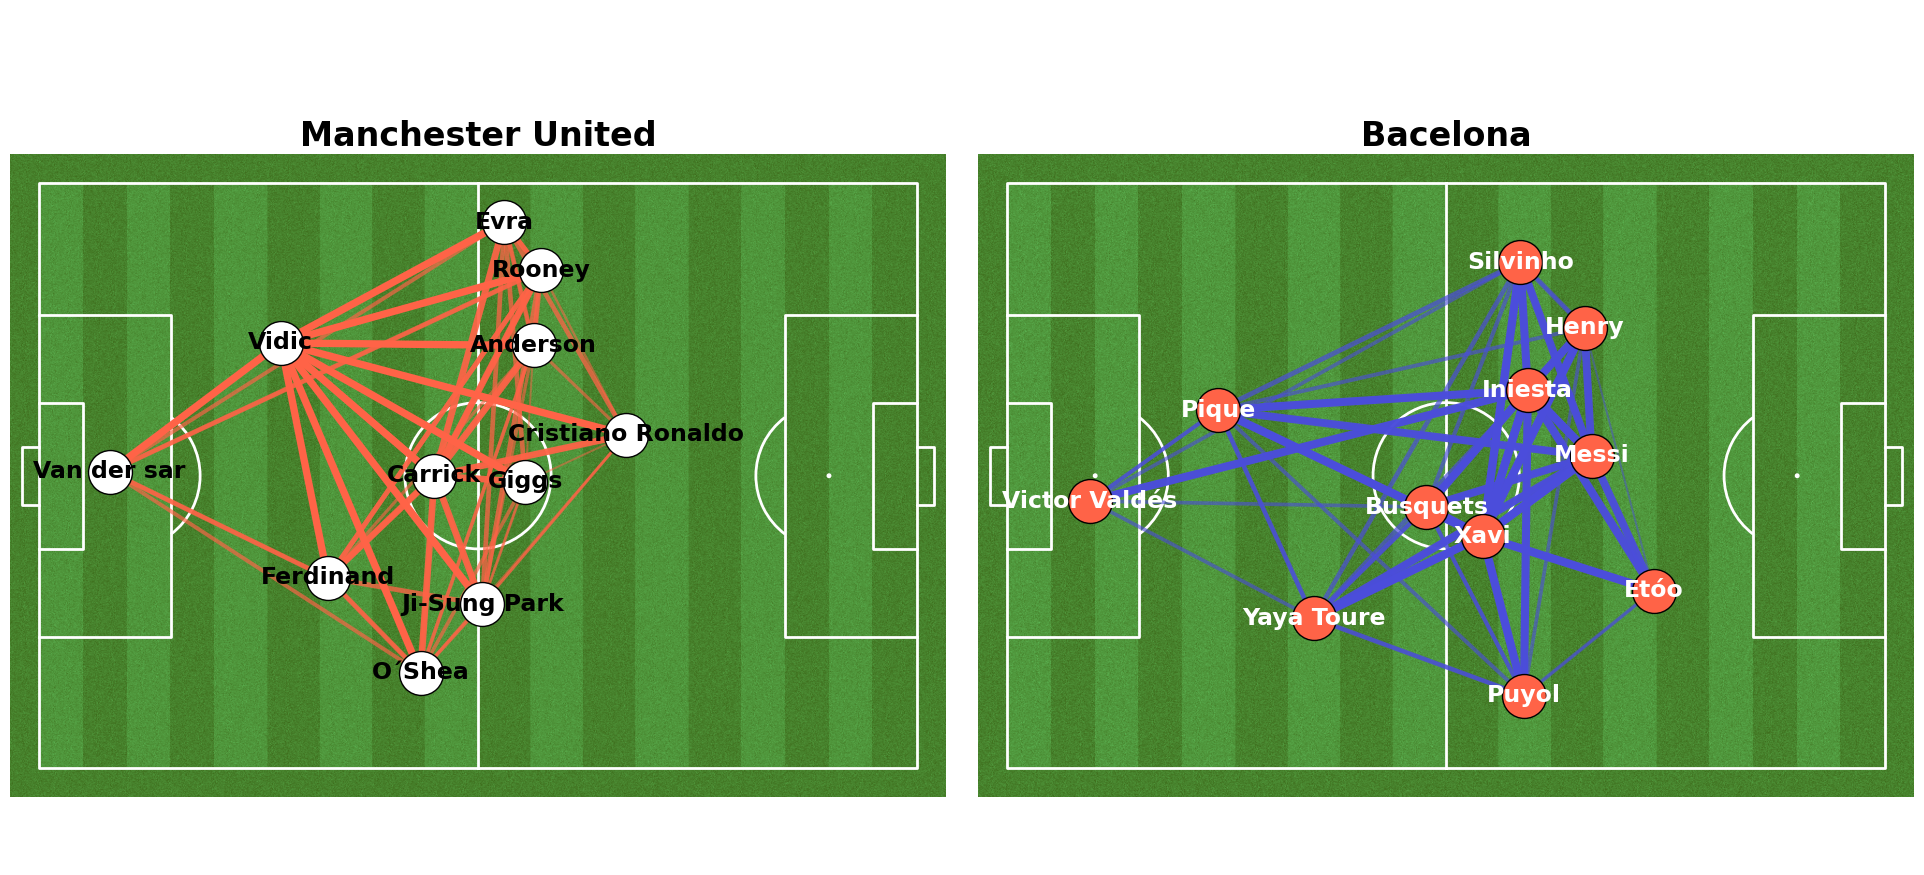

In [266]:
pitch=Pitch(pitch_type='statsbomb',line_color='white',pitch_color='grass', stripe=True, goal_type='box')

fig, axs=pitch.grid(nrows=1,ncols=2, axis=False,)


#Manchester Plot
min_transparency=0.3
color=np.array(to_rgba('#FF6347'))
color=np.tile(color,(len(manchester_df),1))
c_trasnparency=manchester_df['count'] / manchester_df['count'].max()
c_trasnparency=(c_trasnparency*(1-min_transparency))+min_transparency
color[:,3]=c_trasnparency

scatterm=pitch.scatter(x=avg_posm.x,y=avg_posm.y,ax=axs['pitch'][0],
                      color = 'white', edgecolors='black', s=1000, zorder=3)   
linem=pitch.lines(xstart=manchester_df.x,ystart=manchester_df.y,
                  xend=manchester_df.x_end,yend=manchester_df.y_end,ax=axs['pitch'][0],
                 lw=manchester_df['width'], color=color)
for index, row in avg_posm.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='black', va='center',
                   ha='center', size=17, weight='bold', ax=axs['pitch'][0])
ax=axs['pitch'][0].set_title('Manchester United', fontsize=24,weight='bold')
    
    
#Barcelona plot
min_transparency=0.3
color=np.array(to_rgba('#4B4DDB'))
color=np.tile(color,(len(barcelona_df),1))
c_trasnparency=barcelona_df['count'] / barcelona_df['count'].max()
c_trasnparency=(c_trasnparency*(1-min_transparency))+min_transparency
color[:,3]=c_trasnparency

scatterb=pitch.scatter(x=avg_posb.x,y=avg_posb.y,ax=axs['pitch'][1],
                       color = '#FF6347', edgecolors='black', s=1000, zorder=3)   
lineb=pitch.lines(xstart=barcelona_df.x,ystart=barcelona_df.y,
                  xend=barcelona_df.x_end,yend=barcelona_df.y_end,ax=axs['pitch'][1],
                 lw=barcelona_df['width'], color=color)

for index, row in avg_posb.iterrows():
    pitch.annotate(row.player, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=17, weight='bold', ax=axs['pitch'][1])

ax=axs['pitch'][1].set_title('Bacelona', fontsize=24,weight='bold')


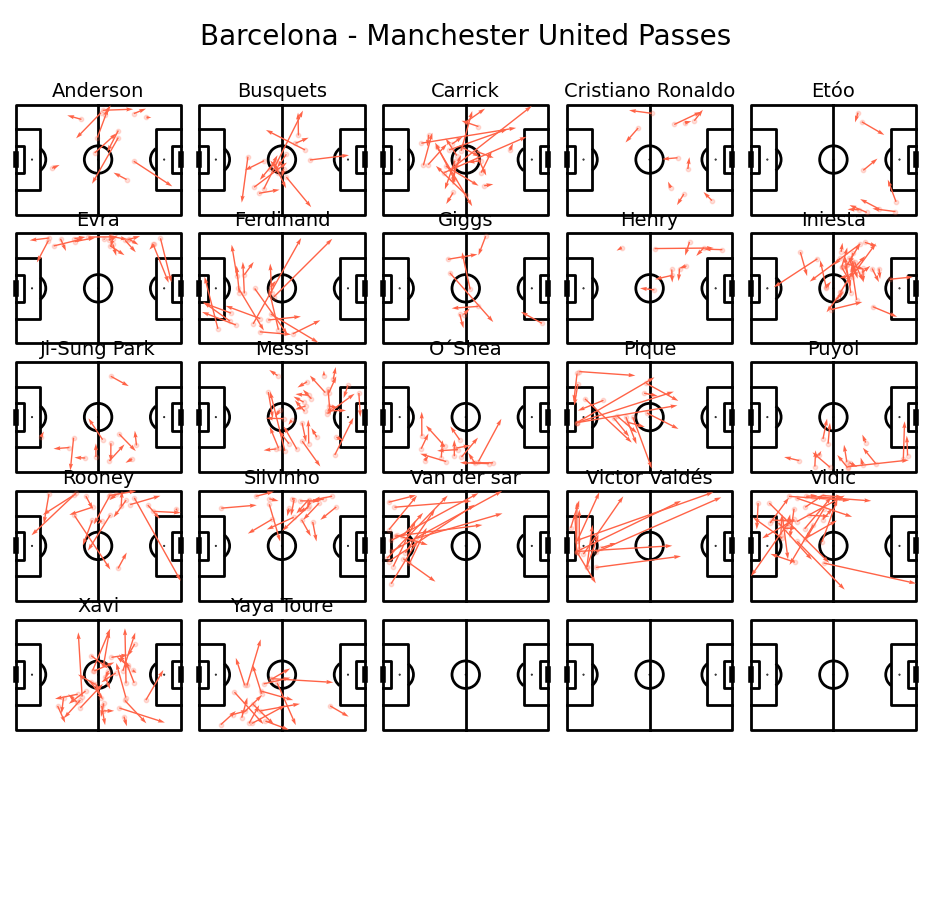

In [467]:
names=player_list
pitch=Pitch(pitch_type='statsbomb', line_color='black')
fig,axs = pitch.grid(ncols = 5, nrows = 6, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name,ax in zip(names,axs['pitch'].flat[:len(names)]):
    #put player name over top
    ax.text(60,-10,name,
           ha='center',va='center', fontsize=14)
    #take only passes by this player
    df_player = df_45[df_45['player'] == name]
    pitch.scatter(df_player.x_start, df_player.y_start, alpha = 0.2, s = 10, color = "#FF6347", ax=ax)
    pitch.arrows(df_player.x_start, df_player.y_start,
            df_player.x_pend, df_player.y_pend, color = "#FF6347", ax=ax, width=1)
        
#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()
    
#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Barcelona - Manchester United Passes", ha='center', va='center', fontsize=20)
plt.show()

# Cr7 - Messi

In [287]:
from scipy.ndimage import gaussian_filter

In [400]:
df2=df[(df.player=='Cristiano Ronaldo')| (df.player=='Messi')]
df2=df2.drop(columns=['location', 'pass_end_location','pass_recipient',
                      'possession_team', 'team', 'minute', 'second',
                     'position'])
cr7=df2[df2.player=='Cristiano Ronaldo']
messi=df2[df2.player=='Messi']
messi

,pass_outcome,pass_type,player,type,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend
7,NaN,NaN,Messi,Pass,NaN,NaN,61.3,41.1,48.4,40.8,NaN,NaN,NaN
1009,NaN,NaN,Messi,Ball Receipt*,NaN,NaN,60.2,43.4,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,Messi,Carry,NaN,NaN,60.2,43.4,NaN,NaN,NaN,NaN,NaN
2679,NaN,NaN,Messi,Pressure,NaN,NaN,96.9,61.6,NaN,NaN,NaN,NaN,NaN
3081,NaN,NaN,Messi,Block,NaN,NaN,87.0,12.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,NaN,NaN,Messi,Ball Receipt*,NaN,NaN,111.5,11.9,NaN,NaN,NaN,NaN,NaN
2663,NaN,NaN,Messi,Carry,NaN,NaN,111.5,11.9,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,Messi,Pass,NaN,NaN,113.9,13.1,92.8,43.8,NaN,NaN,NaN
2947,NaN,NaN,Messi,Foul Won,NaN,NaN,74.2,74.1,NaN,NaN,NaN,NaN,NaN


## Heatmap

In [381]:
players

array(['Messi', 'Cristiano Ronaldo'], dtype=object)

Text(0.5, 0.98, 'Heatmap')

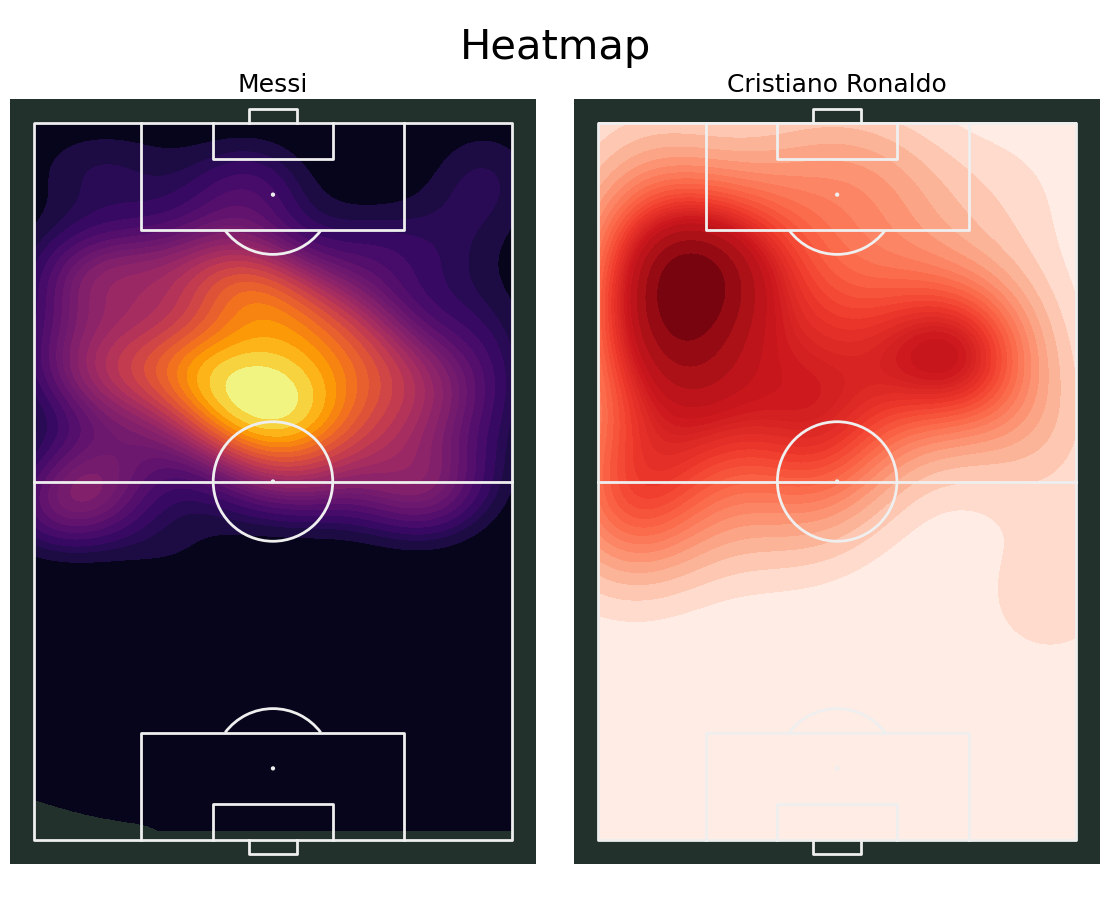

In [528]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef', goal_type='box')
fig, axs=pitch.grid(ncols=2, nrows=1,grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)


#Messi
kde=pitch.kdeplot(x=Messi.x_start, y=Messi.y_start, ax=axs['pitch'][0],fill=True, levels=25,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='inferno')
ax=axs['pitch'][0].set_title('Messi', fontsize=18)


#CR7
kde=pitch.kdeplot(x=cr7.x_start, y=cr7.y_start, ax=axs['pitch'][1],fill=True, levels=25,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    shade_lowest=True,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap='Reds')
ax=axs['pitch'][1].set_title('Cristiano Ronaldo', fontsize=18)
fig.suptitle('Heatmap', fontsize=30)


## Shots and Passes

In [530]:
messi_stats=df[df.player=='Messi']
messi_stats=messi_stats[((messi_stats.type=='Pass') & (messi_stats.pass_outcome!='Incomplete')) | (messi_stats.type=='Shot') ]

cr7_stats=df[df.player=='Cristiano Ronaldo']
cr7_stats=cr7_stats[((cr7_stats.type=='Pass') & (cr7_stats.pass_outcome!='Incomplete')) | (cr7_stats.type=='Shot') ]
messi_stats.sample(3)

,location,pass_end_location,pass_outcome,pass_type,player,pass_recipient,possession_team,team,minute,second,...,shot_end_location,shot_outcome,x_start,y_start,x_pend,y_pend,x_shend,y_shend,z_shend,position
441,"[108.0, 16.9]","[104.8, 26.2]",NaN,NaN,Messi,Etóo,Barcelona,Barcelona,41,55,...,NaN,NaN,108.0,16.9,104.8,26.2,NaN,NaN,NaN,Rw
460,"[56.8, 9.8]","[50.8, 5.8]",NaN,NaN,Messi,Silvinho,Barcelona,Barcelona,43,55,...,NaN,NaN,56.8,9.8,50.8,5.8,NaN,NaN,NaN,Rw
600,"[87.0, 46.4]","[88.0, 38.8]",NaN,NaN,Messi,Etóo,Barcelona,Barcelona,50,27,...,NaN,NaN,87.0,46.4,88.0,38.8,NaN,NaN,NaN,Rw


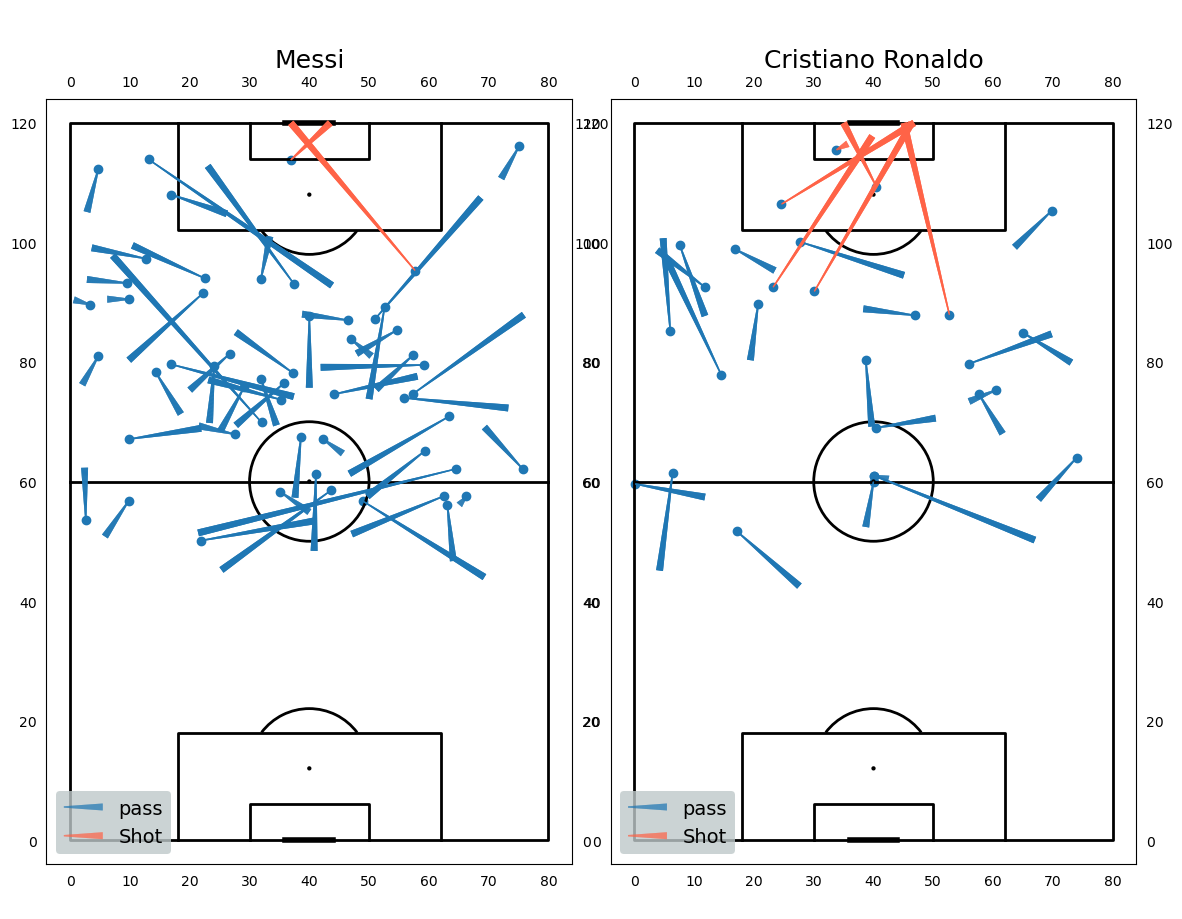

In [527]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='black', axis=True, label=True)
fig, axs=pitch.grid(ncols=2, nrows=1,grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#Messi
ax=axs['pitch'][0].set_title('Messi', fontsize=18)
scatter=pitch.scatter(x=messi_stats.x_start, y=messi_stats.y_start, ax=axs['pitch'][0])
plines=pitch.lines(xstart=messi_stats.x_start, ystart=messi_stats.y_start, xend=messi_stats.x_pend, yend=messi_stats.y_pend,
                   ax=axs['pitch'][0], comet=True, label='pass' )
plines=pitch.lines(xstart=messi_stats.x_start, ystart=messi_stats.y_start, xend=messi_stats.x_shend, yend=messi_stats.y_shend,
                   ax=axs['pitch'][0], comet=True, color='#FF6347', label='Shot' )


axs['pitch'][0].legend(facecolor='#BFC9CA', handlelength=2, edgecolor='None', fontsize=14, loc='lower left')

#cr7
ax=axs['pitch'][1].set_title('Cristiano Ronaldo', fontsize=18)
scatter=pitch.scatter(x=cr7_stats.x_start, y=cr7_stats.y_start, ax=axs['pitch'][1])
plines=pitch.lines(xstart=cr7_stats.x_start, ystart=cr7_stats.y_start, xend=cr7_stats.x_pend, yend=cr7_stats.y_pend,
                   ax=axs['pitch'][1], comet=True, label='pass' )
plines=pitch.lines(xstart=cr7_stats.x_start, ystart=cr7_stats.y_start, xend=cr7_stats.x_shend, yend=cr7_stats.y_shend,
                   ax=axs['pitch'][1], comet=True, color='#FF6347', label='Shot' )
axs['pitch'][1].legend(facecolor='#BFC9CA', handlelength=2, edgecolor='None', fontsize=14, loc='lower left')